# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 2a. Feature Selection with RandomForestClassifier

In this section we use the feature matrices and the response vector that we prepared in chapter 1.  

#### We use two different versions (created in chapter 1):
Version 1: Feature Matrix, consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  We will do Feature Selection and generate feature matrices with only selected n features for each Version above


In [115]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier

## 2.0. CHOOSE: which Feature Matrix (Version 1 or 2) you want to use

#### Choose the Dataset Version you want
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data


In [116]:
############### CHOOSE
VERSION = 2

"""
INSERT NUMBER
1 FOR VERSION 1
2 FOR VERSION 2    
"""
###############

# Defining sel_state variable for usage later and printing text according to your choise   
if VERSION == 1:
    sel_version = 'Based on Dataset with only the Ratios Dataset as predicive Features'
    print('You chose Version 1 as working dataset. The Following Feature Selection will be ' + sel_version)
elif VERSION == 2:
    sel_version = 'Based on Dataset with Ratios, Seasonality & other Market Data as predictive Features'
    print('You chose Version 2 as working dataset. The Following Feature Selection will be ' + sel_version)
else: raise ValueError('VERSION must be either 1 or 2')

You chose Version 2 as working dataset. The Following Feature Selection will be Based on Dataset with Ratios, Seasonality & other Market Data as predictive Features


## 2.1. Preparation

### 2.1.1 Import the Response Vector and the Feature Matrices

In [117]:
# Load in the response vector pre-generated in Chater 1 (Preparation of Data)
y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)

In [118]:
# Load in te feature matrix according to the version you chose in section 2.0. above
if VERSION == 1:
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
elif VERSION == 2:
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
else: raise ValueError('VERSION value must be either 1 or 2')

### 2.1.2. Train/ Test Split and fill missing values with median

Note: Standardization is not done here because it is not necessary for Random Forest.                                        

### Train/ Test Split

Apply on chosen unsplitted, unimputed and unstandardized feature matrix and response vector.

In [119]:
# Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Extract all the feature labels for the respective chosen version
feature_labels = list(X)
print('Type of feature_labels = ' + str(type(feature_labels)), '\n')
#display(np.array(feature_labels))

Type of feature_labels = <class 'list'> 



### Fill missing values (NaN)

We use Imputer to fill missing entries with median only AFTER the split, to circumvent the bias that both splits would include information of each other.

In [120]:
# Use a median fill for train set
imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
imputed_dataset.columns = X_train.columns
imputed_dataset.index = X_train.index
X_train = imputed_dataset

# Use a median fill for the test set
imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
imputed_dataset.columns = X_test.columns
imputed_dataset.index = X_test.index
X_test = imputed_dataset

### 2.2.3. Print out Shape and Form of Feature Matrix and Response Vector

### Train set

In [131]:
# Check if there is the approximately same percentage of '1' the train response vector
print('Ratio of "UP" (Train) = ' + str(round(y_train['0'].sum() / y_train.size, 4)*100) + '%', '\n')

# Print and display properties and head of the training set we will use in the following
print('Shape of Feature Matrix X_train = ' + str(X_train.shape), '\n')
print('Feature Matrix X_train: (below)')
display(X_train.head(3))
print('\n')
print('Response Vector y_train: (below)')
display(y_train.head(3))

Ratio of "UP" (Train) = 58.07% 

Shape of Feature Matrix X_train = (2836, 181) 

Feature Matrix X_train: (below)


,SHRFLG,SHRENDDT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,...,CUSIP_65410610,CUSIP_71708110,CUSIP_74271810,CUSIP_88579Y10,CUSIP_89417E10,CUSIP_91301710,CUSIP_91324P10,CUSIP_92343V10,CUSIP_92826C83,CUSIP_93114210
1530,0.0,20140929.0,28.04,29.49,29.39,4611190.0,0.024042,29.40,29.41,6340863.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,20130730.0,32.17,34.65,32.17,1296447.0,-0.057168,32.16,32.17,1209589.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,20140330.0,54.31,58.49,56.82,3473222.0,0.026373,56.83,56.84,3786825.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Response Vector y_train: (below)


,0
1530,0
1397,1
2238,0


### Test set

In [133]:
# Check if there is the approximately same percentage of '1' in the test response vector
print('Ratio of "UP" (Test)  =  ' + str(round(y_test['0'].sum() / y_test.size, 4)*100) + '%', '\n')

# Print and display properties and head of the training set we will use in the following
print('Shape of Feature Matrix X_test = ' + str(X_test.shape), '\n')
print('Feature Matrix X_test')
display(X_test.head(3))
print('\n')
print('Response Vector y_test')
display(y_test.head(3))

Ratio of "UP" (Test)  =  57.04% 

Shape of Feature Matrix X_test = (710, 181) 

Feature Matrix X_test


,SHRFLG,SHRENDDT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,...,CUSIP_65410610,CUSIP_71708110,CUSIP_74271810,CUSIP_88579Y10,CUSIP_89417E10,CUSIP_91301710,CUSIP_91324P10,CUSIP_92343V10,CUSIP_92826C83,CUSIP_93114210
817,0.0,20141009.0,97.87,103.30,100.75,15283673.0,-0.017073,100.75,100.76,5866161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,20131030.0,72.43,77.64,75.52,746229.0,0.050202,75.53,75.54,1078864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,0.0,20100225.0,18.53,20.00,18.66,10148052.0,0.025838,18.66,18.67,8069536.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Response Vector y_test


,0
817,1
2592,0
1475,1


###    
## 2.2. Selecting & Extracting Features

### 2.2.1.  Fit forest and show list of best 'n' features according to explanatory value

# ===> MATHIAS LOOP FOR RUNNING THE CODE WITH  random_state 0 to 10 and then select best n features

In [227]:
forest = RandomForestClassifier(random_state = 0)
forest.max_depth = 6
forest.fit(X_train, y_train)

# Check features for their importance for the prediction
feature_importances = forest.feature_importances_

# sort features in line with their importance for the prediction (therefore ::-1)
indices = np.argsort(feature_importances)[::-1]

# print best n features
n = 15
for i in range(n):
    print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, feature_labels[indices[i]], 
                                          feature_importances[indices[i]]))
del i

# feature_labels[indices[:n]] or similar is creating the following error: 
# TypeError: only integer scalar arrays can be converted to a scalar index
# therefore we make a loop to generate a listwhere the best n features labels are extracted into
# this list can be used in the plot in the following

df_lab = []
i= 0
for i in range(n):
    sel_ind = indices[0+i]
    lab = feature_labels[sel_ind]
    df_lab.append(lab)
del i
display(np.array(df_lab))

 1 ewretx  0.0798
 2 SHRENDDT 0.0488
 3 vwretx  0.0479
 4 vwretd  0.0453
 5 sprtrn  0.0448
 6 ewretd  0.0415
 7 CAPEI   0.0298
 8 pe_op_basic 0.0296
 9 ALTPRCDT 0.0273
10 VOL     0.0225
11 RET     0.0194
12 ASK     0.0172
13 pe_inc  0.0158
14 PEG_ltgforward 0.0157
15 BIDLO   0.0148


array(['ewretx', 'SHRENDDT', 'vwretx', 'vwretd', 'sprtrn', 'ewretd',
       'CAPEI', 'pe_op_basic', 'ALTPRCDT', 'VOL', 'RET', 'ASK', 'pe_inc',
       'PEG_ltgforward', 'BIDLO'], dtype='<U14')

### 2.2.2.  Plotting results

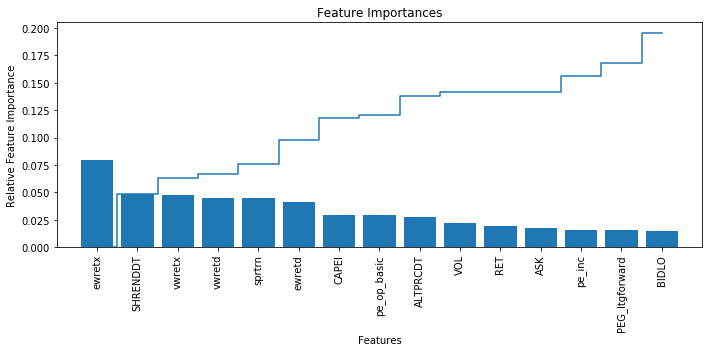

In [228]:
# Get cumsum of the n most important features
feat_imp = np.sort(feature_importances)[::-1]
sum_feat_imp = np.cumsum(feature_importances)[:n]

# Plot Feature Importance (both cumulative and individual)
plt.figure(figsize = (10, 5))
plt.title('Feature Importances')
plt.bar(range(n), feature_importances[indices[:n]], align = 'center')
plt.xticks(range(n), df_lab, rotation = 90)
plt.xlim([-1, n])
plt.xlabel('Features')
plt.ylabel('Relative Feature Importance')
plt.step(range(n), sum_feat_imp, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

### 2.2.3. Extract best 'n' Variables and save into new Feature Matrices


### Extract

Automatically etract the chosen number n best variables directly from the feature matrices X_train and X_test into new ones X_train_f and X_test_f.                                                                                                                
The f in the end stands for feature selection with random'f'orest.


In [229]:
# generate new empty list for best features to be extracted into
best_features = []

# loop to append best n features onto the new list best_features
n = 15
for i in range(n):
    best_features.append(feature_labels[indices[i]])
del i

# extract data of train and test feature matrix where column names are the same as those of the n best features
# The f at the end of the datasets refer to the fact that the features were selected with random'f'orest
X_train_f = X_train[best_features]
X_test_f = X_test[best_features]
feature_labels_f = X_train_f.columns[:]

# display and print results
#print('Best Features after Random Forest are: ', '\n')
#display(np.array(best_features))
#print('Head of X_train_f is: (below) ', '\n')
#display(X_train_f.head(2))
#print('\n')
#print('Extracted feature labels are: (below)')
#display(feature_labels_f[:])

In [230]:
# Show feature matrices (train, test) after feature selection
print("")
print('Feature Matrix with selected Features (Train):')
display(X_train_f.head(2))
print("")
print('Feature Matrix with selected Features (Test):')
display(X_test_f.head(2))
print("")


Feature Matrix with selected Features (Train):


,ewretx,SHRENDDT,vwretx,vwretd,sprtrn,ewretd,CAPEI,pe_op_basic,ALTPRCDT,VOL,RET,ASK,pe_inc,PEG_ltgforward,BIDLO
1530,0.032156,20140929.0,0.038183,0.040186,0.037655,0.033697,20.773,15.468,20140829.0,4611190.0,0.024042,29.41,18.484,5.963,28.04
1397,-0.015631,20130730.0,-0.017055,-0.015039,-0.014999,-0.013012,25.089,17.203,20130628.0,1296447.0,-0.057168,32.17,39.232,5.702,32.17



Feature Matrix with selected Features (Test):


,ewretx,SHRENDDT,vwretx,vwretd,sprtrn,ewretd,CAPEI,pe_op_basic,ALTPRCDT,VOL,RET,ASK,pe_inc,PEG_ltgforward,BIDLO
817,-0.046891,20141009.0,-0.026823,-0.025129,-0.015514,-0.044988,20.983,16.127,20140930.0,15283673.0,-0.017073,100.76,16.224,1.330,97.87
2592,0.049754,20131030.0,0.035682,0.037477,0.029749,0.051828,21.663,16.311,20130930.0,746229.0,0.050202,75.54,18.555,1.572,72.43


### Save

Feature Matrices and Response Vectors after Train/Test Split and after Feature Selection are saved as csv:             
Version 1 (ratios as explanatory variables)                                                                          
Version 2 (ratios + seasonality + market data).

In [231]:
# Save generated splitted datasets (feature matrices and response vectors) after having relevant feature selected
# The 'f' at the end of the name of the dataset stands for the fact that features have been selected with random'f'orest
if VERSION == 1:
    X_train_f.to_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', index = False)
    X_test_f.to_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', index = False)
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', index = False)
elif VERSION == 2:
    X_train_f.to_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', index = False)
    X_test_f.to_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', index = False)
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', index = False)
else: raise ValueError('VERSION value must be either 1 or 2')